<a href="https://colab.research.google.com/github/nicolerdz/Regresion-no-lineal-y-logistica/blob/main/2023_8_Regresion_no_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv('Gastos_y_costos_2023_sin_nulos.csv')
df

,Unnamed: 0,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,...,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,3.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,P,Vigente,NaN
1,1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,3.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,P,Vigente,NaN
2,2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,...,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,...,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,...,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,I,Vigente,NaN
393,393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,...,220.00,0.00,0.0,0.0,0.0,220.00,220.00,I,Vigente,NaN
394,394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,...,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,I,Vigente,NaN
395,395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,...,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,I,Vigente,NaN


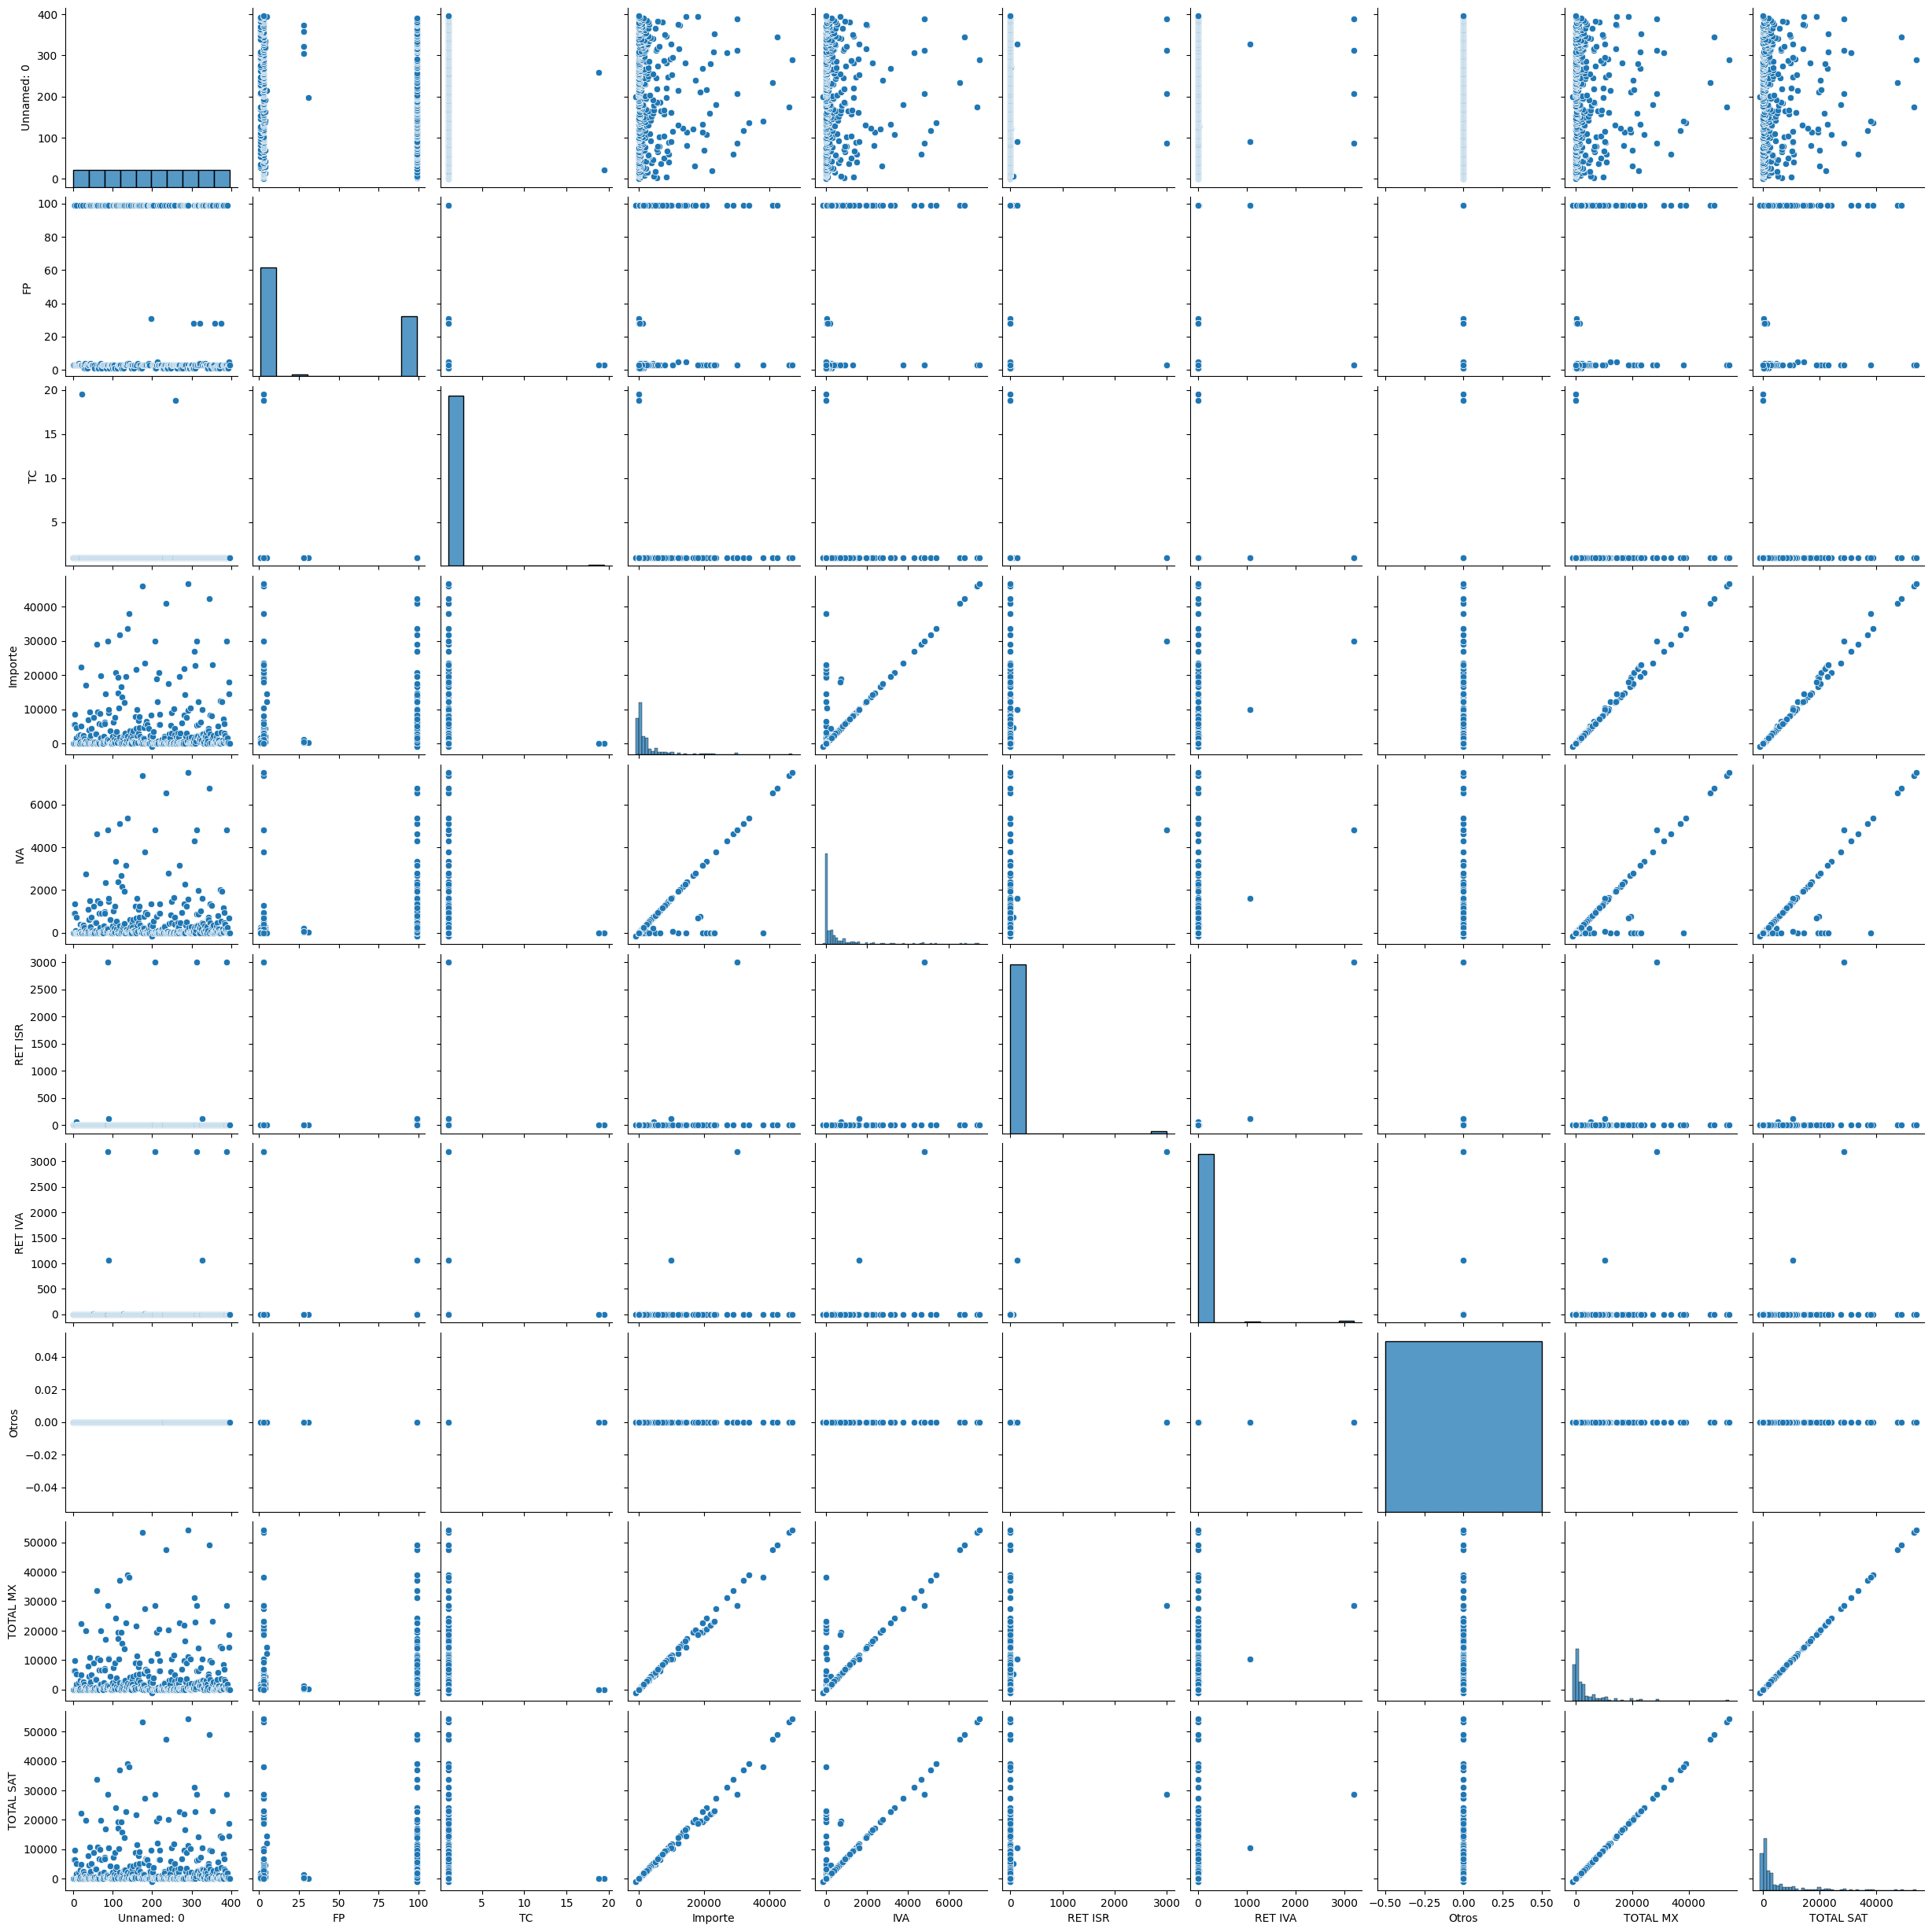

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   397 non-null    int64  
 1   Fecha        397 non-null    object 
 2   Folio        397 non-null    object 
 3   UUID         397 non-null    object 
 4   RFC          397 non-null    object 
 5   Proveedor    397 non-null    object 
 6   TIPO GASTO   397 non-null    object 
 7   Descripción  397 non-null    object 
 8   MP           397 non-null    object 
 9   FP           397 non-null    float64
 10  TC           397 non-null    float64
 11  Importe      397 non-null    float64
 12  IVA          397 non-null    float64
 13  RET ISR      397 non-null    float64
 14  RET IVA      397 non-null    float64
 15  Otros        397 non-null    float64
 16  TOTAL MX     397 non-null    float64
 17  TOTAL SAT    397 non-null    float64
 18  Tipo         397 non-null    object 
 19  Status  

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

## **MODELO LINEAL**

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.72055268]),
 'rank_': 1,
 'singular_': array([21653.34448675]),
 'intercept_': 1010.2875531120521}

**Modelo matemático: y= 6.72055268 + 1010.2875531120521**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7784301734139256

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8822868997179577

## **MODELO NO LINEAL**

### **MODELO 1 CUADRÁTICO**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.34872526e-04, 6.02538896e+00, 1.16341139e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['IVA'], df['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,1163.411387
1,1163.411387
2,6621.687993
3,6622.314493
4,9560.744414
...,...
392,1163.411387
393,1163.411387
394,5337.942869
395,1163.411387


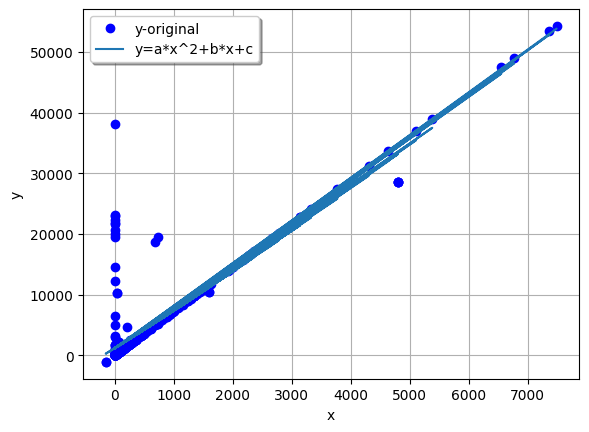

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.779882322397788

### **MODELO 2 CUBICO**

In [ ]:
def func2(x, a, b, c):
    return a*x**3 + b*x**2 + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-2.45729715e-07,  2.67882214e-03,  2.19703572e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['IVA'], df['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a*x**3 + b*x**2 + c

In [ ]:
yfit2

,IVA
0,1.163411e+03
1,1.163411e+03
2,4.849314e+06
3,4.850416e+06
4,1.136024e+07
...,...
392,1.163411e+03
393,1.163411e+03
394,2.849864e+06
395,1.163411e+03


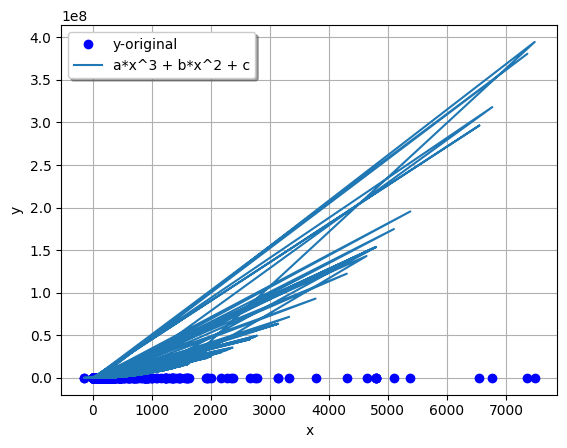

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*x^3 + b*x^2 + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

-26749522.972481985